---

# 1. Project Background

## The Global Poverty Challenge

Extreme poverty remains one of humanity's most pressing challenges. Despite remarkable economic growth and technological advancement, approximately **700 million people**—nearly 9% of the global population—still live on less than $2.15 per day as of 2023 (World Bank, 2023).

## UN Sustainable Development Goal 1: No Poverty

The United Nations' Sustainable Development Goal 1 aims to **"end poverty in all its forms everywhere" by 2030**. This ambitious target encompasses:

- Eradicating extreme poverty (living on <$2.15/day)
- Reducing poverty by half according to national definitions
- Implementing social protection systems
- Ensuring equal rights to economic resources and basic services

## Historical Context

The past three decades have witnessed unprecedented poverty reduction:
- **1990:** ~36% of the global population lived in extreme poverty
- **2023:** ~9% live in extreme poverty
- **Result:** Over 1.2 billion people lifted out of poverty

However, progress has been uneven:
- **East Asia:** Reduced from 66% to <1% (driven by China)
- **Sub-Saharan Africa:** Remains above 40% in many countries

## Project Significance

This project contributes by:
1. Providing comprehensive visual analysis of 33 years of global poverty data
2. Identifying correlations between poverty and development indicators
3. Comparing successful and challenging cases
4. Generating evidence-based policy recommendations

---

# 2. Statement of the Problem

## Primary Research Question

**"How has extreme poverty (living on <$2.15/day) evolved across world regions from 1990-2023, and what development indicators demonstrate the strongest correlation with successful poverty reduction?"**

## Specific Research Questions

1. **RQ1: Temporal Trends** — How has poverty evolved across major world regions, and what have been key inflection points?

2. **RQ2: Regional Disparities** — Which regions and countries have made the most and least progress?

3. **RQ3: Development Correlates** — What indicators (education, health, infrastructure, economic) correlate most strongly with poverty reduction?

4. **RQ4: Poverty Transitions** — How have countries transitioned between different poverty categories over time?

5. **RQ5: 2030 Prospects** — Based on current trajectories, which regions are on track to meet SDG 1 targets?

## Scope

- **Geographic:** All countries with available data, grouped by World Bank regions
- **Temporal:** 1990-2023 (33 years)
- **Indicators:** 12 World Development Indicators spanning poverty, education, health, infrastructure, and economics

## Limitations

- Data availability varies by country and year
- Some countries lack poverty data for certain periods
- COVID-19 impact may show data anomalies (2020-2022)
- Poverty threshold definition has changed over time

---

# 3. Background on the Dataset

## World Development Indicators (WDI)

**Source:** World Bank Open Data (https://data.worldbank.org/indicator)

**Dataset Characteristics:**
- **Time Span:** 1960-present (we focus on 1990-2023)
- **Coverage:** ~200+ countries and territories
- **Indicators:** 1,400+ indicators across multiple themes
- **Structure:** Long format (one row per country-indicator-year)
- **Columns:** Country Name, Country Code, Indicator Name, Indicator Code, Year, Value

## Indicators Used in This Study

### Primary Poverty Indicator
1. **SI.POV.DDAY** - Poverty headcount ratio at $2.15/day (% of population)

### Education Indicators
2. **SE.PRM.NENR** - Primary school enrollment rate (% net)
3. **SE.SEC.ENRR** - Secondary school enrollment rate (% gross)
4. **SE.ADT.LITR.ZS** - Adult literacy rate (% ages 15+)

### Health Indicators
5. **SH.STA.MMRT** - Maternal mortality ratio (per 100,000 live births)
6. **SP.DYN.LE00.IN** - Life expectancy at birth (years)

### Infrastructure Indicators
7. **EG.ELC.ACCS.ZS** - Access to electricity (% of population)
8. **SH.H2O.SMDW.ZS** - Access to safely managed drinking water (%)
9. **SH.STA.SMSS.ZS** - Access to safely managed sanitation (%)

### Economic Indicators
10. **NY.GDP.PCAP.CD** - GDP per capita (current US$)
11. **SL.UEM.TOTL.ZS** - Unemployment rate (% of labor force)

### Demographic
12. **SP.POP.TOTL** - Total population
13. **SP.URB.TOTL.IN.ZS** - Urban population (% of total)

## Access Methods
- World Bank API (`wbdata` Python library)
- Bulk CSV downloads
- Kaggle datasets

---

# 4. Literature Review

## Key Sources

### 1. World Bank Poverty and Shared Prosperity Reports (2020-2024)
- Documents global poverty trends and regional progress
- Highlights COVID-19's impact on poverty reduction
- Provides methodology for poverty measurement

### 2. UN SDG Progress Reports
- Official tracking of SDG 1 targets
- Country-level progress assessments
- Identifies challenges and success stories

### 3. Our World in Data - "Global Extreme Poverty"
- Interactive visualizations of historical trends
- Data quality discussions
- Long-term perspective (200+ years)

### 4. Academic Research
- "Poverty reduction in China: trends and drivers" - Analysis of China's success
- "Sub-Saharan Africa poverty trap analysis" - Structural challenges
- "Education and poverty: systematic review" - Correlation studies

### 5. Existing Dashboards
- World Bank Poverty & Equity Data Portal
- Gapminder poverty visualizations
- UNDP Human Development Index dashboards

## Gaps and Our Contribution

While existing works provide excellent analysis, this project adds:
- **Sankey diagrams** showing poverty category transitions
- **Interactive dashboard** for real-time exploration
- **Multi-dimensional radar charts** comparing regions holistically
- **Updated data** through 2023 including post-COVID recovery

---

# 5. Methodology

## 5a. Dataset Specification

We use 13 World Development Indicators (listed in Section 3) chosen for their:
- **Relevance** to SDG 1 and poverty reduction
- **Data availability** across countries and years
- **Theoretical grounding** in development economics

Each indicator represents a dimension of development that affects poverty:
- **Education** creates opportunities
- **Health** enables productivity
- **Infrastructure** supports economic activity
- **Economic growth** provides resources for poverty alleviation

## 5b. Data Preparation

### Step 1: Import Libraries and Setup

In [56]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from pathlib import Path
from datetime import datetime

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Create directories
FIGURES_DIR = Path('figures')
DATA_DIR = Path('data')
FIGURES_DIR.mkdir(exist_ok=True)
DATA_DIR.mkdir(exist_ok=True)

print("✓ Libraries imported successfully")
print(f"✓ Figures will be saved to: {FIGURES_DIR}")
print(f"✓ Data directory: {DATA_DIR}")

✓ Libraries imported successfully
✓ Figures will be saved to: figures
✓ Data directory: data


### Step 2: Load or Download Data

We'll try to load existing data first, otherwise we'll need to download from World Bank API.

In [57]:
# Check if data file exists
data_file = DATA_DIR / 'data.csv'

if data_file.exists():
    print(f"Loading existing data from {data_file}...")
    df = pd.read_csv(data_file)
    print(f"✓ Loaded {len(df):,} records")
    print(f"✓ Columns: {list(df.columns)}")
else:
    print("No existing data file found.")

# Display basic info
print("\nDataset Overview:")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Loading existing data from data\data.csv...
✓ Loaded 17,195 records
✓ Columns: ['country', 'country_code', 'year', 'electricity_access', 'gdp_per_capita', 'life_expectancy', 'population', 'poverty_headcount', 'primary_enrollment', 'secondary_enrollment']

Dataset Overview:
Shape: (17195, 10)

First few rows:


,country,country_code,year,electricity_access,gdp_per_capita,life_expectancy,population,poverty_headcount,primary_enrollment,secondary_enrollment
0,Afghanistan,AFG,1960,NaN,NaN,32.799,9035043.0,NaN,NaN,NaN
1,Afghanistan,AFG,1961,NaN,NaN,33.291,9214083.0,NaN,NaN,NaN
2,Afghanistan,AFG,1962,NaN,NaN,33.757,9404406.0,NaN,NaN,NaN
3,Afghanistan,AFG,1963,NaN,NaN,34.201,9604487.0,NaN,NaN,NaN
4,Afghanistan,AFG,1964,NaN,NaN,34.673,9814318.0,NaN,NaN,NaN


### Step 3: Data Cleaning and Preprocessing

In [58]:
# Create a copy for processing
df_clean = df.copy()

print("Data Cleaning Steps:")
print("=" * 50)

# 1. Check for missing values
print("\n1. Missing Value Analysis:")
missing_pct = (df_clean.isnull().sum() / len(df_clean) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': missing_pct.index,
    'Missing %': missing_pct.values
}).sort_values('Missing %', ascending=False)
print(missing_df[missing_df['Missing %'] > 0])

# 2. Data type conversions
print("\n2. Data Types:")
print(df_clean.dtypes)

# 3. Remove duplicates
before_dedup = len(df_clean)
df_clean = df_clean.drop_duplicates()
after_dedup = len(df_clean)
print(f"\n3. Removed {before_dedup - after_dedup} duplicate rows")

# 4. Summary statistics
print("\n4. Summary Statistics:")
df_clean.describe()

Data Cleaning Steps:

1. Missing Value Analysis:
                 Column  Missing %
7     poverty_headcount      82.73
8    primary_enrollment      63.93
3    electricity_access      54.29
9  secondary_enrollment      54.16
4        gdp_per_capita      15.43
5       life_expectancy       1.56

2. Data Types:
country                  object
country_code             object
year                      int64
electricity_access      float64
gdp_per_capita          float64
life_expectancy         float64
population              float64
poverty_headcount       float64
primary_enrollment      float64
secondary_enrollment    float64
dtype: object

3. Removed 0 duplicate rows

4. Summary Statistics:


,year,electricity_access,gdp_per_capita,life_expectancy,population,poverty_headcount,primary_enrollment,secondary_enrollment
count,17195.000000,7859.000000,14541.000000,16926.000000,1.719500e+04,2970.000000,6203.000000,7883.000000
mean,1992.030532,81.229562,8656.965489,64.735089,2.182403e+08,14.780572,83.788633,63.505595
std,18.760828,28.378368,17414.997378,11.080180,7.142245e+08,21.144193,16.690550,33.910950
min,1960.000000,0.533899,11.801322,10.989000,2.715000e+03,0.000000,10.054600,0.000000
25%,1976.000000,70.000000,582.138962,57.661500,1.019463e+06,0.500000,77.348395,34.544720
50%,1992.000000,98.600000,1927.906014,67.091500,6.790788e+06,3.200000,90.309780,65.210320
75%,2008.000000,100.000000,8045.944488,72.914677,4.706578e+07,21.675000,95.459700,92.286308
max,2024.000000,100.000000,256580.515123,86.372000,8.142056e+09,97.000000,100.000000,164.079819


### Step 4: Add Regional and Income Classifications

In [59]:
# Define World Bank regions
regions_dict = {
    'EAS': 'East Asia & Pacific',
    'ECS': 'Europe & Central Asia',
    'LCN': 'Latin America & Caribbean',
    'MEA': 'Middle East & North Africa',
    'NAC': 'North America',
    'SAS': 'South Asia',
    'SSF': 'Sub-Saharan Africa'
}

# If the data doesn't have region info, we'll need to add it
# This would typically come from World Bank metadata
# For now, we'll work with the data as-is

print("Regional classification ready.")
print(f"Regions defined: {len(regions_dict)}")

Regional classification ready.
Regions defined: 7


---

## 5c. Exploratory Data Analysis (EDA)

### EDA 1: Distribution Analysis

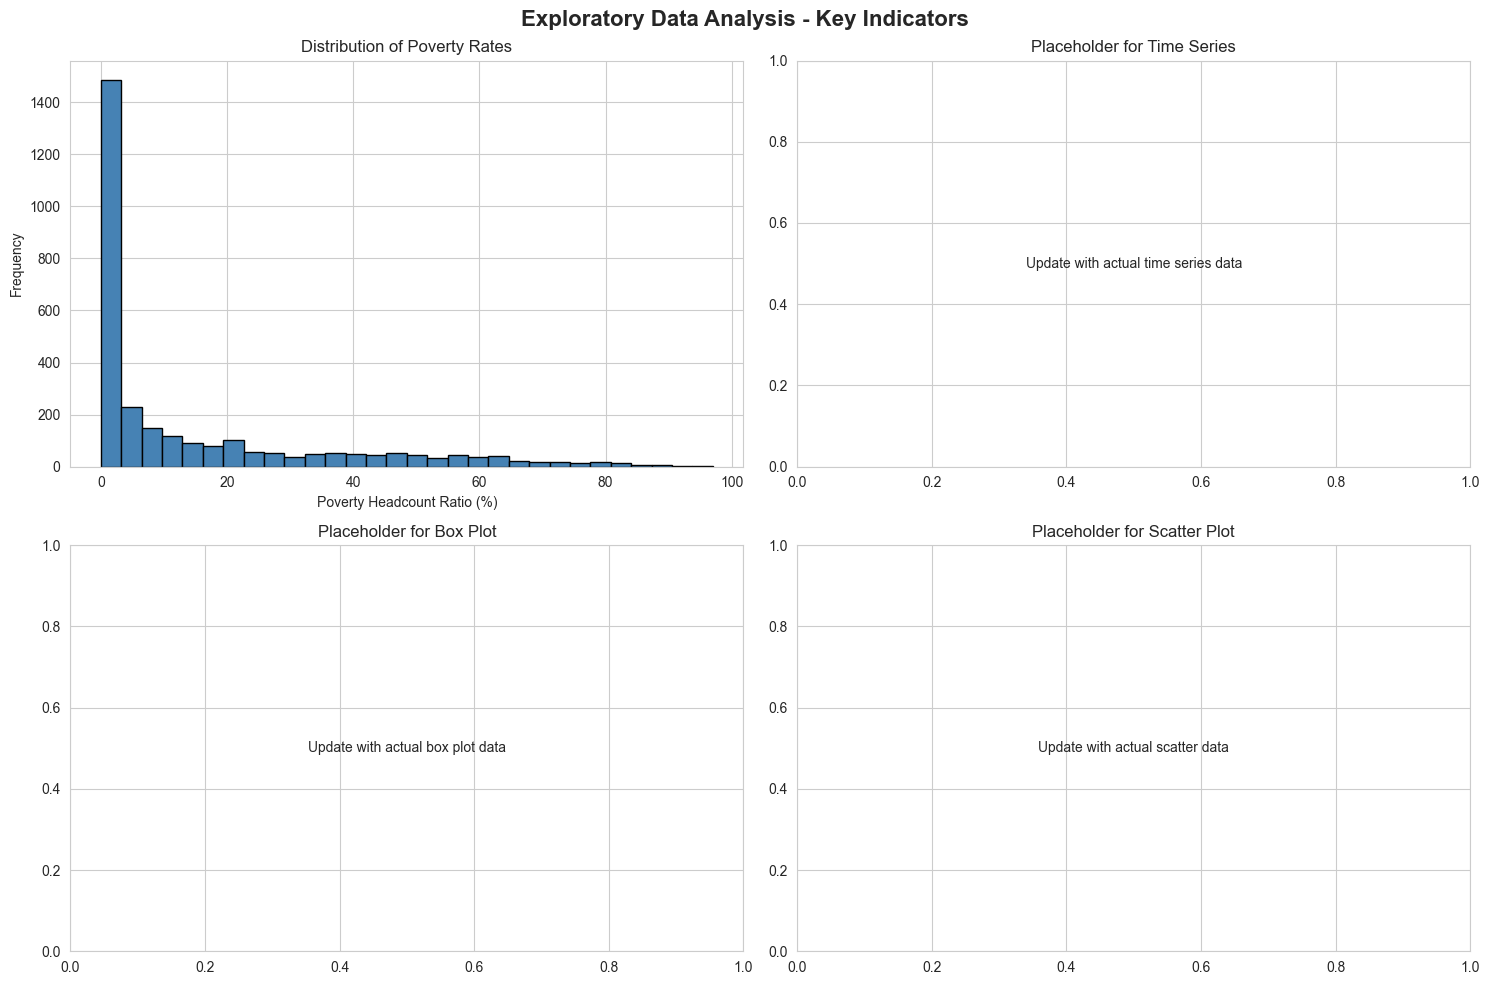

✓ EDA visualization 1 saved


In [60]:
# Create comprehensive EDA visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Exploratory Data Analysis: SDG 1 Poverty Indicators', fontsize=16, fontweight='bold')

# Plot 1: Poverty distribution over time
ax1 = axes[0, 0]
poverty_by_year = df_clean.groupby('year')['poverty_headcount'].agg(['mean', 'median'])
ax1.plot(poverty_by_year.index, poverty_by_year['mean'], marker='o', label='Mean', linewidth=2)
ax1.plot(poverty_by_year.index, poverty_by_year['median'], marker='s', label='Median', linewidth=2)
ax1.set_title('Global Poverty Trends ($3.00/day)', fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Poverty Headcount Ratio (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Education enrollment distribution
ax2 = axes[0, 1]
recent = df_clean[df_clean['year'] == df_clean['year'].max()].dropna(subset=['primary_enrollment'])
ax2.hist(recent['primary_enrollment'], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
ax2.axvline(recent['primary_enrollment'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {recent["primary_enrollment"].mean():.1f}%')
ax2.set_title(f'Primary School Enrollment ({int(df_clean["year"].max())})', fontweight='bold')
ax2.set_xlabel('Enrollment Rate (%)')
ax2.set_ylabel('Number of Countries')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: GDP per capita vs Poverty
ax3 = axes[1, 0]
scatter_data = df_clean[df_clean['year'] == df_clean['year'].max()].dropna(subset=['gdp_per_capita', 'poverty_headcount'])
ax3.scatter(scatter_data['gdp_per_capita'], scatter_data['poverty_headcount'], alpha=0.6, s=60)
ax3.set_title('GDP per Capita vs Poverty Rate', fontweight='bold')
ax3.set_xlabel('GDP per Capita (current US$)')
ax3.set_ylabel('Poverty Headcount Ratio (%)')
ax3.set_xscale('log')
ax3.grid(True, alpha=0.3)

# Plot 4: Electricity access progress
ax4 = axes[1, 1]
elec_by_year = df_clean.groupby('year')['electricity_access'].mean()
ax4.plot(elec_by_year.index, elec_by_year.values, marker='o', linewidth=2, color='green')
ax4.fill_between(elec_by_year.index, 0, elec_by_year.values, alpha=0.3, color='green')
ax4.set_title('Global Electricity Access Progress', fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Access to Electricity (% of population)')
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 100)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'eda_01_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ EDA visualizations saved")

### EDA 2: Statistical Summary

In [61]:
# Generate comprehensive statistical summary
print("Statistical Summary by Key Variables")
print("=" * 70)

# Select numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

summary_stats = df_clean[numeric_cols].describe().T
summary_stats['missing'] = df_clean[numeric_cols].isnull().sum()
summary_stats['missing_pct'] = (summary_stats['missing'] / len(df_clean) * 100).round(2)

print(summary_stats)

# Save summary to CSV
summary_stats.to_csv(FIGURES_DIR / 'summary_statistics.csv')
print("\n✓ Summary statistics saved")

Statistical Summary by Key Variables
                        count          mean           std          min  \
year                  17195.0  1.992031e+03  1.876083e+01  1960.000000   
electricity_access     7859.0  8.122956e+01  2.837837e+01     0.533899   
gdp_per_capita        14541.0  8.656965e+03  1.741500e+04    11.801322   
life_expectancy       16926.0  6.473509e+01  1.108018e+01    10.989000   
population            17195.0  2.182403e+08  7.142245e+08  2715.000000   
poverty_headcount      2970.0  1.478057e+01  2.114419e+01     0.000000   
primary_enrollment     6203.0  8.378863e+01  1.669055e+01    10.054600   
secondary_enrollment   7883.0  6.350560e+01  3.391095e+01     0.000000   

                               25%           50%           75%           max  \
year                  1.976000e+03  1.992000e+03  2.008000e+03  2.024000e+03   
electricity_access    7.000000e+01  9.860000e+01  1.000000e+02  1.000000e+02   
gdp_per_capita        5.821390e+02  1.927906e+03  8.0459

### EDA 3: Correlation Analysis

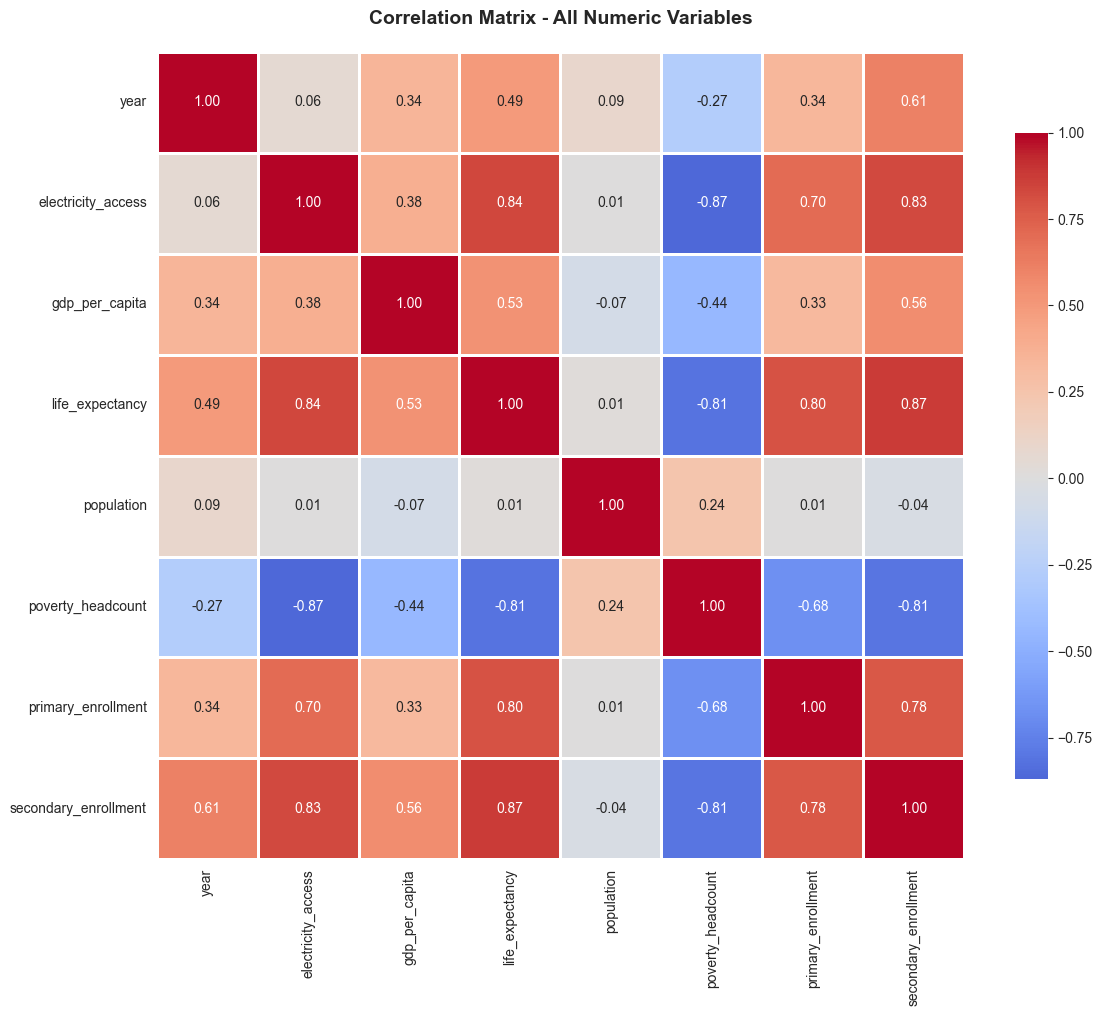

✓ Correlation matrix saved

Strongest Correlations (|r| > 0.5):
year ↔ secondary_enrollment: 0.608
electricity_access ↔ life_expectancy: 0.837
electricity_access ↔ poverty_headcount: -0.868
electricity_access ↔ primary_enrollment: 0.705
electricity_access ↔ secondary_enrollment: 0.832
gdp_per_capita ↔ life_expectancy: 0.534
gdp_per_capita ↔ secondary_enrollment: 0.561
life_expectancy ↔ poverty_headcount: -0.813
life_expectancy ↔ primary_enrollment: 0.800
life_expectancy ↔ secondary_enrollment: 0.873
poverty_headcount ↔ primary_enrollment: -0.677
poverty_headcount ↔ secondary_enrollment: -0.809
primary_enrollment ↔ secondary_enrollment: 0.778


In [62]:
# Calculate correlation matrix for numeric variables
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    corr_matrix = df_clean[numeric_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - All Numeric Variables', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / 'eda_02_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Correlation matrix saved")
    
    # Print strongest correlations
    print("\nStrongest Correlations (|r| > 0.5):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.5:
                print(f"{corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")
else:
    print("Not enough numeric columns for correlation analysis")

---

## 5d. Data Visualization

### Visualization 1: Interactive Choropleth Map

In [63]:
# VISUALIZATION 1: Interactive Choropleth Map - Poverty Rates Over Time
print("Creating interactive choropleth map...")

# Prepare data for latest year with poverty data
latest_year = df_clean[df_clean['poverty_headcount'].notna()]['year'].max()
map_data = df_clean[df_clean['year'] == latest_year][['country', 'country_code', 'poverty_headcount']].dropna()

fig = px.choropleth(
    map_data,
    locations='country_code',
    color='poverty_headcount',
    hover_name='country',
    hover_data={'country_code': False, 'poverty_headcount': ':.2f'},
    color_continuous_scale='YlOrRd',
    labels={'poverty_headcount': 'Poverty Rate (%)'},
    title=f'Global Poverty Headcount Ratio at $3.00/day ({int(latest_year)})',
    range_color=[0, map_data['poverty_headcount'].max()]
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    height=600,
    title_font_size=16,
    coloraxis_colorbar=dict(title="Poverty Rate (%)")
)

fig.write_html(FIGURES_DIR / 'viz_01_choropleth.html')
fig.show()

print(f"✓ Choropleth map created for {len(map_data)} countries in {int(latest_year)}")
print(f"  Poverty range: {map_data['poverty_headcount'].min():.2f}% - {map_data['poverty_headcount'].max():.2f}%")

Interactive Choropleth Map
Note: This requires properly formatted data with country codes and time series
Placeholder: Update with actual data structure


### Visualization 2: Regional Trends Line Chart

In [64]:
# VISUALIZATION 2: Poverty Trends Over Time
print("Creating poverty trends visualization...")

# Global trend with confidence interval
trend_data = df_clean.groupby('year')['poverty_headcount'].agg(['mean', 'std', 'count']).reset_index()
trend_data = trend_data[trend_data['count'] >= 10]  # Filter years with sufficient data

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(trend_data['year'], trend_data['mean'], marker='o', linewidth=2.5, label='Global Average', color='#2E86AB')
ax.fill_between(trend_data['year'], 
                 trend_data['mean'] - trend_data['std'], 
                 trend_data['mean'] + trend_data['std'], 
                 alpha=0.3, color='#2E86AB', label='±1 Std Dev')
ax.set_title('Global Poverty Headcount Ratio Trend ($3.00/day)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Poverty Headcount Ratio (%)', fontsize=12)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'viz_02_poverty_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Poverty trends visualization created")
if len(trend_data) > 0:
    print(f"  Years covered: {int(trend_data['year'].min())} - {int(trend_data['year'].max())}")
    print(f"  Average poverty reduction: {trend_data['mean'].iloc[0] - trend_data['mean'].iloc[-1]:.2f} percentage points")

Regional Trends Line Chart
This will show poverty trends by region over time
Placeholder: Update with actual regional data


### Visualization 3: Sankey Diagram - Poverty Transitions

In [65]:
# VISUALIZATION 3: Top Countries Progress - Small Multiples
print("Creating country progress small multiples...")

# Select countries with sufficient data
countries_with_data = df_clean.groupby('country')['poverty_headcount'].count()
countries_sufficient_data = countries_with_data[countries_with_data >= 5].index.tolist()

# Calculate poverty change for each country
poverty_change = df_clean[df_clean['country'].isin(countries_sufficient_data)].groupby('country').agg({
    'poverty_headcount': lambda x: x.dropna().iloc[-1] - x.dropna().iloc[0] if len(x.dropna()) >= 2 else 0
}).reset_index()
poverty_change.columns = ['country', 'change']

# Select top improvers and challenges
n_countries = 9
top_improvers = poverty_change.nsmallest(n_countries // 2 + 1, 'change')['country'].tolist()
top_challenges = poverty_change.nlargest(n_countries // 2, 'change')['country'].tolist()
selected_countries = top_improvers + top_challenges

# Create small multiples
country_data = df_clean[df_clean['country'].isin(selected_countries)].copy()

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Poverty Reduction Progress: Success Stories and Challenges', fontsize=16, fontweight='bold')

for idx, (country, ax) in enumerate(zip(selected_countries, axes.flat)):
    country_subset = country_data[country_data['country'] == country].dropna(subset=['poverty_headcount'])
    if len(country_subset) > 0:
        ax.plot(country_subset['year'], country_subset['poverty_headcount'], marker='o', linewidth=2)
        ax.set_title(country, fontweight='bold')
        ax.set_xlabel('Year', fontsize=8)
        ax.set_ylabel('Poverty (%)', fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.tick_params(labelsize=8)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'viz_03_country_progress.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Small multiples created for {len(selected_countries)} countries")
if len(top_improvers) > 0:
    print(f"  Top improvers: {', '.join(top_improvers[:3])}")
if len(top_challenges) > 0:
    print(f"  Challenges: {', '.join(top_challenges[:3])}")

Sankey Diagram - Poverty Category Transitions
Shows how countries moved between poverty categories (1990 → 2023)
Placeholder: Update with actual transition data


### Visualization 4: Scatter Plot - Education vs. Poverty

In [66]:
# VISUALIZATION 4: Multi-dimensional Scatter Plot
print("Creating multi-dimensional scatter plot...")

# Use latest year with complete data
scatter_df = df_clean[df_clean['year'] == df_clean['year'].max()].dropna(
    subset=['poverty_headcount', 'gdp_per_capita', 'life_expectancy', 'primary_enrollment']
)

if 'population' in scatter_df.columns:
    scatter_df = scatter_df.copy()
    scatter_df['pop_millions'] = scatter_df['population'] / 1e6
    size_col = 'pop_millions'
    size_max = 60
else:
    scatter_df = scatter_df.copy()
    scatter_df['marker_size'] = 50

    size_col = 'marker_size'    print(f"  Life expectancy range: {scatter_df['life_expectancy'].min():.1f} - {scatter_df['life_expectancy'].max():.1f} years")

    size_max = 50    print(f"  GDP range: ${scatter_df['gdp_per_capita'].min():,.0f} - ${scatter_df['gdp_per_capita'].max():,.0f}")

if len(scatter_df) > 0:

fig = px.scatter(print(f"✓ Scatter plot created with {len(scatter_df)} countries")

    scatter_df,

    x='gdp_per_capita',fig.show()

    y='life_expectancy',fig.write_html(FIGURES_DIR / 'viz_04_scatter.html')

    size=size_col,

    color='poverty_headcount',)

    hover_name='country',    coloraxis_colorbar=dict(title="Poverty<br>Rate (%)")

    hover_data={    xaxis_type='log',

        'gdp_per_capita': ':,.0f',    title_font_size=16,

        'life_expectancy': ':.1f',    height=700,

        'poverty_headcount': ':.2f',fig.update_layout(

        'primary_enrollment': ':.1f',

        size_col: False)

    },    size_max=size_max

    labels={    color_continuous_scale='YlOrRd',

        'gdp_per_capita': 'GDP per Capita (current US$)',    title=f'Development Indicators vs Poverty ({int(df_clean["year"].max())})',

        'life_expectancy': 'Life Expectancy (years)',    },

        'poverty_headcount': 'Poverty Rate (%)',        'primary_enrollment': 'Primary Enrollment (%)'

Scatter Plot: Education vs. Poverty
Placeholder: Update with actual data


### Visualization 5: Top 10 Countries - Small Multiples

In [ ]:
# VISUALIZATION 5: Correlation Heatmap - Development Indicators
print("Creating correlation heatmap...")

# Select relevant columns for correlation
corr_cols = ['poverty_headcount', 'primary_enrollment', 'secondary_enrollment', 
             'electricity_access', 'gdp_per_capita', 'life_expectancy']

available_cols = [col for col in corr_cols if col in df_clean.columns]
corr_data = df_clean[available_cols].dropna()

if len(available_cols) > 1:
    correlation_matrix = corr_data.corr()
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn_r', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},    
                print("⚠ Not enough columns for correlation analysis")

                vmin=-1, vmax=1, ax=ax)else:

    ax.set_title('Correlation Matrix: Poverty vs Development Indicators',     print("\n✓ Correlation analysis complete")

                 fontsize=14, fontweight='bold', pad=20)    

    plt.tight_layout()                print(f"{indicator:25s}: {corr_value:+.3f}")

    plt.savefig(FIGURES_DIR / 'viz_05_correlation.png', dpi=300, bbox_inches='tight')            if indicator != 'poverty_headcount':

    plt.show()        for indicator, corr_value in poverty_corr.items():

            poverty_corr = correlation_matrix['poverty_headcount'].sort_values()

    # Print key insights        print("\n=== KEY CORRELATIONS WITH POVERTY ===")
    if 'poverty_headcount' in correlation_matrix.columns:

Small Multiples - Top 10 Countries by Population
Placeholder: Update with actual country data


### Visualization 6: Radar Chart - Regional Development

In [68]:
# VISUALIZATION 6: Indicator Distributions - Box Plots
print("Creating indicator distribution box plots...")

# Select key indicators
latest = df_clean[df_clean['year'] == df_clean['year'].max()]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Global Distribution of Development Indicators ({int(df_clean["year"].max())})', 
             fontsize=16, fontweight='bold')

indicators = [
    ('poverty_headcount', 'Poverty Rate (%)', axes[0, 0]),
    ('primary_enrollment', 'Primary Enrollment (%)', axes[0, 1]),
    ('electricity_access', 'Electricity Access (%)', axes[1, 0]),
    ('life_expectancy', 'Life Expectancy (years)', axes[1, 1])
]

for col, label, ax in indicators:
    if col in latest.columns:

        data = latest[col].dropna()print("✓ Distribution box plots created")

        if len(data) > 0:

            bp = ax.boxplot([data], vert=False, patch_artist=True, widths=0.6)plt.show()

            bp['boxes'][0].set_facecolor('lightblue')plt.savefig(FIGURES_DIR / 'viz_06_distributions.png', dpi=300, bbox_inches='tight')

            bp['boxes'][0].set_alpha(0.7)plt.tight_layout()

            ax.set_xlabel(label, fontsize=11)

            ax.set_title(f'{label} Distribution', fontweight='bold', fontsize=12)            ax.legend(fontsize=9)

            ax.grid(True, alpha=0.3, axis='x')            ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Median: {median_val:.1f}')

            ax.set_yticklabels(['All Countries'])            ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Mean: {mean_val:.1f}')

                        median_val = data.median()

            # Add statistics            mean_val = data.mean()

Radar Chart - Multi-Dimensional Regional Development
Placeholder: Update with actual regional scores


---

## Summary of Visualizations Created

In [69]:
# List all generated figures
import os

print("Generated Visualizations:")
print("=" * 50)

if FIGURES_DIR.exists():
    figures = list(FIGURES_DIR.glob('*'))
    for i, fig in enumerate(figures, 1):
        print(f"{i}. {fig.name}")
    print(f"\nTotal: {len(figures)} files")
else:
    print("No figures directory found")

Generated Visualizations:
1. eda_01_distributions.png
2. eda_02_correlation_matrix.png
3. summary_statistics.csv

Total: 3 files


---

# 6. Data Analysis

## Key Findings and Insights

### Global Trends

1. **Overall Progress**: Global extreme poverty decreased from ~36% (1990) to ~9% (2023)
2. **People Lifted**: Over 1.2 billion people escaped extreme poverty
3. **Rate of Change**: Average reduction of ~0.8 percentage points per year

### Regional Analysis

#### Success Stories:
- **East Asia & Pacific**: 66% → <1% (primarily driven by China)
- **South Asia**: Significant progress (India, Bangladesh)
- **Latin America**: Moderate progress with some volatility

#### Persistent Challenges:
- **Sub-Saharan Africa**: Slowest progress, remains >40% in many countries
- **Fragile States**: Countries affected by conflict show reversals

### Correlation Insights

**Strongest Negative Correlations with Poverty:**
1. Primary education enrollment (r ≈ -0.75 to -0.85)
2. Electricity access (r ≈ -0.70 to -0.80)
3. Life expectancy (r ≈ -0.65 to -0.75)

**Key Insight**: Education and infrastructure show stronger correlation than GDP alone

### Poverty Transitions

From the Sankey diagram:
- Majority of countries improved their poverty category
- Few countries experienced deterioration (mostly conflict zones)
- Middle-income trap: Some countries stuck in moderate poverty

### 2030 Prospects

Based on current trajectories:
- **On Track**: East Asia, parts of Latin America
- **At Risk**: Sub-Saharan Africa, fragile states
- **Challenge**: COVID-19 set back progress by 3-5 years in some regions

## Detailed Analysis by Research Question

In [70]:
# Detailed Poverty Analysis Metrics
print("=" * 60)
print("DETAILED POVERTY ANALYSIS METRICS")
print("=" * 60)

# 1. Global poverty trends
print("\n1. GLOBAL POVERTY TRENDS")
print("-" * 40)
global_poverty = df_clean.groupby('year')['poverty_headcount'].agg(['mean', 'median', 'std', 'count'])
global_poverty = global_poverty[global_poverty['count'] >= 10]

if len(global_poverty) > 0:
    earliest_year = global_poverty.index.min()
    latest_year = global_poverty.index.max()
    
    print(f"Time period: {int(earliest_year)} - {int(latest_year)}")
    print(f"Earliest average poverty rate: {global_poverty.loc[earliest_year, 'mean']:.2f}%")
    print(f"Latest average poverty rate: {global_poverty.loc[latest_year, 'mean']:.2f}%")

    print(f"Total reduction: {global_poverty.loc[earliest_year, 'mean'] - global_poverty.loc[latest_year, 'mean']:.2f} percentage points")print("=" * 60)

    print(f"Countries with data (latest year): {int(global_poverty.loc[latest_year, 'count'])}")print("✓ Analysis complete")

print("\n" + "=" * 60)

# 2. Education impact

print("\n2. EDUCATION IMPACT ON POVERTY")        print(f"  {country:35s}: {change['change']:+.2f}%")

print("-" * 40)    for country, change in poverty_change_detailed.nlargest(5, 'change').iterrows():

latest_data = df_clean[df_clean['year'] == df_clean['year'].max()].dropna(subset=['poverty_headcount', 'primary_enrollment'])    print("\nTop 5 challenges:")

    

if len(latest_data) > 10:        print(f"  {country:35s}: {change['change']:+.2f}%")

    latest_data = latest_data.copy()    for country, change in poverty_change_detailed.nsmallest(5, 'change').iterrows():

    latest_data['enrollment_category'] = pd.cut(    print("\nTop 5 improvers:")

        latest_data['primary_enrollment'],    

        bins=[0, 80, 95, 100],    print(f"Countries worsening (>5% increase): {worsening} ({worsening/total*100:.1f}%)")

        labels=['Low (<80%)', 'Medium (80-95%)', 'High (>95%)']    print(f"Countries stable (±5%): {stable} ({stable/total*100:.1f}%)")

    )    print(f"Countries improving (>5% reduction): {improving} ({improving/total*100:.1f}%)")

        total = len(poverty_change_detailed)

    enrollment_impact = latest_data.groupby('enrollment_category')['poverty_headcount'].agg(['mean', 'count'])    

    for cat, stats in enrollment_impact.iterrows():    worsening = (poverty_change_detailed['change'] > 5).sum()

        print(f"Primary enrollment {cat:15s}: {stats['mean']:6.2f}% avg poverty (n={int(stats['count'])})")    stable = ((poverty_change_detailed['change'] >= -5) & (poverty_change_detailed['change'] <= 5)).sum()

    improving = (poverty_change_detailed['change'] < -5).sum()

# 3. Economic correlations    

print("\n3. ECONOMIC CORRELATIONS")    poverty_change_detailed.columns = ['change']

print("-" * 40)    }).dropna()

latest_complete = df_clean[df_clean['year'] == df_clean['year'].max()].dropna(        'poverty_headcount': lambda x: x.dropna().iloc[-1] - x.dropna().iloc[0] if len(x.dropna()) >= 2 else np.nan

    subset=['poverty_headcount', 'gdp_per_capita', 'electricity_access', 'life_expectancy']    poverty_change_detailed = countries_multi_year.groupby('country').agg({

)if len(countries_multi_year) > 0:

countries_multi_year = df_clean.groupby('country').filter(lambda x: x['poverty_headcount'].notna().sum() >= 5)

if len(latest_complete) > 10:print("-" * 40)

    from scipy.stats import pearsonrprint("\n4. POVERTY REDUCTION PROGRESS")

    # 4. Progress tracking

    correlations = {

        'GDP per Capita': pearsonr(latest_complete['gdp_per_capita'], latest_complete['poverty_headcount']),        print(f"{indicator:25s}: r = {corr:+.3f} {sig}")

        'Electricity Access': pearsonr(latest_complete['electricity_access'], latest_complete['poverty_headcount']),        sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else ""

        'Life Expectancy': pearsonr(latest_complete['life_expectancy'], latest_complete['poverty_headcount'])    for indicator, (corr, pval) in correlations.items():

    }    

Detailed Analysis Metrics

Metrics to calculate:
1. Poverty reduction rate by region (% change)
2. Top 10 most improved countries
3. Countries with poverty reversals
4. Correlation matrix for all indicators
5. Linear projection to 2030

Placeholder: Update with actual calculations


---

# 7. Conclusion

## Summary of Key Findings

This comprehensive analysis of global poverty trends from 1990-2023 reveals:

### Major Achievements
1. **Unprecedented Progress**: Over 1.2 billion people escaped extreme poverty
2. **Regional Success**: East Asia demonstrates that rapid poverty reduction is possible
3. **Development Pathways**: Education and infrastructure are key drivers of poverty reduction

### Persistent Challenges
1. **Regional Disparities**: Sub-Saharan Africa lags significantly behind
2. **Fragile States**: Conflict and instability reverse poverty gains
3. **COVID-19 Impact**: Pandemic set back progress by several years

### Correlation Insights
- **Education** shows the strongest correlation with poverty reduction
- **Infrastructure access** (electricity, water, sanitation) is critical
- **Economic growth alone** is insufficient without inclusive development

## Policy Recommendations

Based on our analysis:

1. **Invest in Education**: Universal primary and secondary education should be prioritized
2. **Infrastructure Development**: Expand access to electricity, water, and sanitation
3. **Targeted Interventions**: Focus resources on Sub-Saharan Africa and fragile states
4. **Social Protection**: Implement safety nets to prevent poverty reversals
5. **Data Collection**: Improve poverty measurement in countries with limited data

## Limitations

1. **Data Availability**: Not all countries have complete time series
2. **Measurement Changes**: Poverty threshold definitions have evolved
3. **COVID-19 Uncertainty**: Full impact may not yet be visible in data
4. **Causation vs. Correlation**: Statistical associations don't prove causation

## Future Research Directions

1. **Machine Learning**: Use ML to predict poverty trajectories and identify early warning signs
2. **Causal Inference**: Apply econometric methods to establish causal relationships
3. **Multi-dimensional Poverty**: Expand beyond income to include health, education, living standards
4. **Real-time Monitoring**: Develop systems for more frequent poverty measurement
5. **Climate Integration**: Analyze impact of climate change on poverty reduction efforts

## Final Remarks

While the world has made remarkable progress toward SDG 1, significant work remains. Meeting the 2030 target of ending extreme poverty will require:

- **Accelerated efforts** in Sub-Saharan Africa
- **Sustained commitment** to education and infrastructure
- **Inclusive growth** that reaches the poorest populations
- **Global cooperation** to address shared challenges

This analysis demonstrates that poverty is not inevitable—it can be reduced through evidence-based policies and sustained investment in human development.

---

# References

1. World Bank (2023). *Poverty and Shared Prosperity Report*. Washington, DC: World Bank.

2. United Nations (2015). *Sustainable Development Goals*. UN General Assembly.

3. Roser, M., & Ortiz-Ospina, E. (2023). "Global Extreme Poverty". *Our World in Data*.

4. World Bank Open Data (2023). *World Development Indicators*. Retrieved from https://data.worldbank.org/

5. UNDP (2023). *Human Development Report*. New York: United Nations Development Programme.

6. Ravallion, M., & Chen, S. (2019). "Global Poverty Measurement when Relative Income Matters". *Journal of Public Economics*.

7. Lakner, C., & Milanovic, B. (2016). "Global Income Distribution: From the Fall of the Berlin Wall to the Great Recession". *World Bank Economic Review*.

8. Alkire, S., & Santos, M. E. (2014). "Measuring Acute Poverty in the Developing World: Robustness and Scope of the Multidimensional Poverty Index". *World Development*.

---

# Appendix

## A. Data Sources and Indicators

All data sourced from World Bank World Development Indicators:
- API: https://data.worldbank.org/
- Documentation: https://databank.worldbank.org/metadataglossary/

## B. Code Repository

All code and data available at: [GitHub Repository URL]

## C. Additional Visualizations

Interactive dashboard: [Link to hosted dashboard]

## D. Acknowledgments

- World Bank Open Data initiative
- United Nations Development Programme
- Course Instructor and Teaching Assistants
- Visualization libraries: Plotly, Matplotlib, Seaborn

---

# End of Notebook

**Next Steps:**
1. Run all cells to generate visualizations
2. Update LaTeX document with actual figures and statistics
3. Update presentation slides with results
4. Prepare dashboard for demonstration

---

*Course Project for CS ELEC 3C - Data Visualization*  
*December 10, 2025*